# 최단경로 알고리즘 문제

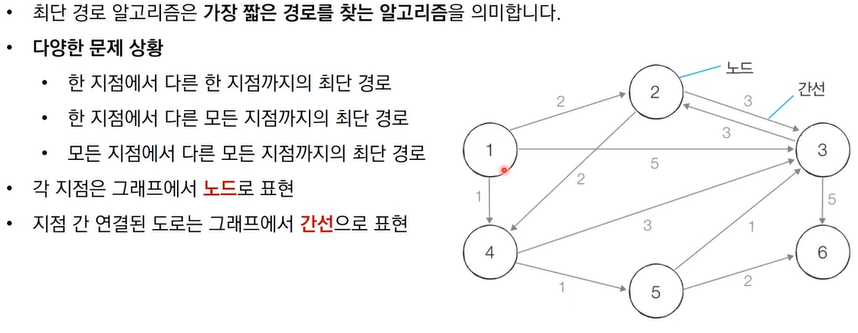

### 다익스트라 최단 경로 알고리즘
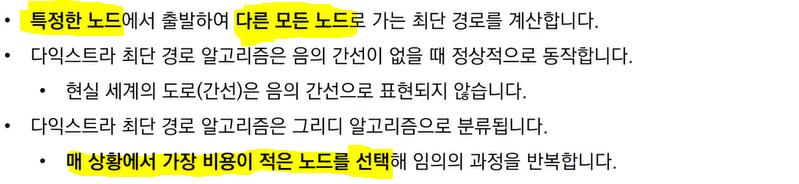
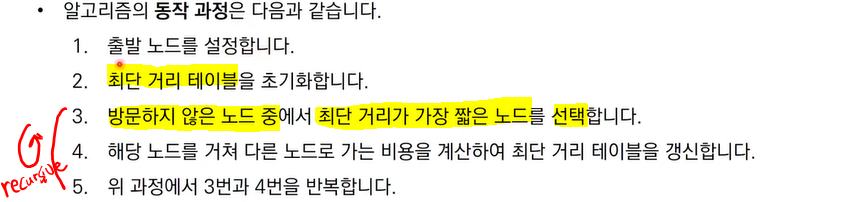
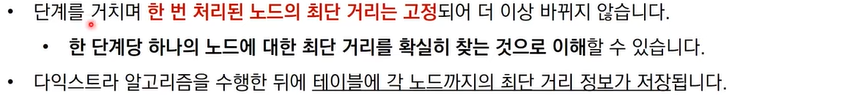

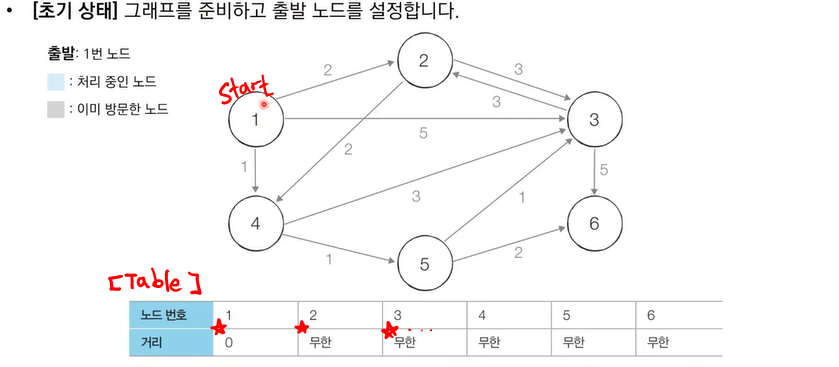
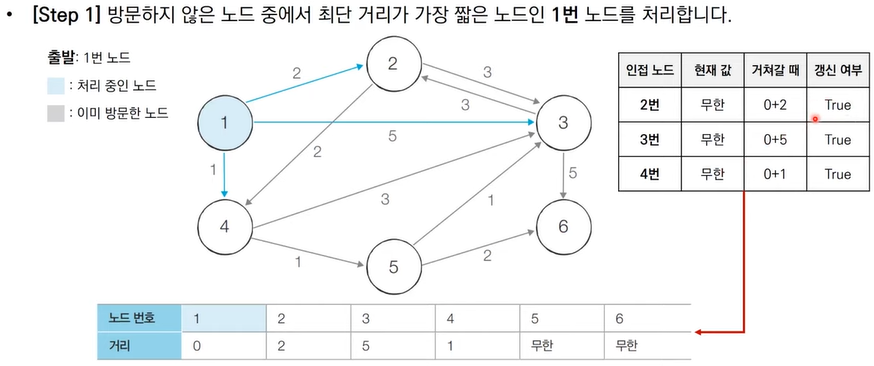
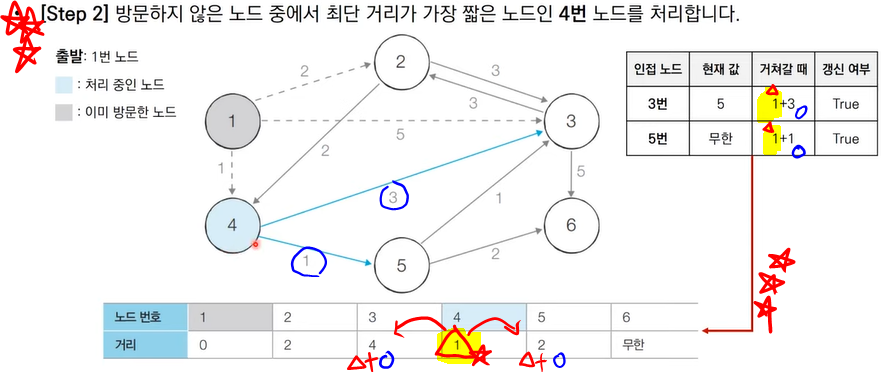
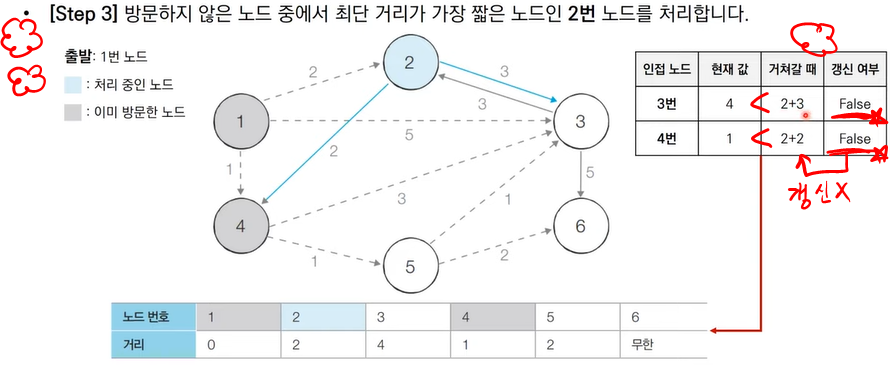
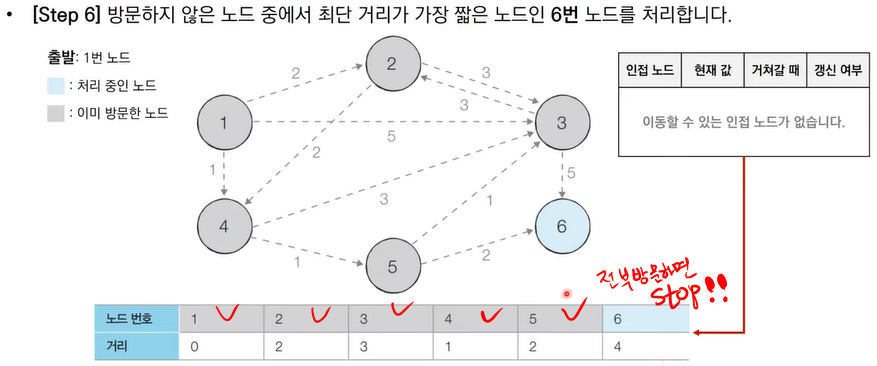

In [ ]:
''' python - 해설 코드를 가져옴 '''

""" < 사전준비 >"""
import sys
input = sys.stdin.readline

n, m = map(int, input().split())   # 노드수, edge 수

start = int(input())

visited = [False] * (n+1)          # 각 노드 방문 여부

INF = int(1e9)                      # 무한으로 10억 설정
distance = [INF] * (n+1)            # 각 노드 Cost

graph = [[] for i in range(n+1)]   # graph는 이웃노드를 담는 리스트(=edge를 초기화)

# 모든 edge 정보 받기
for _ in range(m):
    a, b, c = map(int, input().split())
    graph[a].append((b,c))               # index a -> index b로갈 때 Cost c를 tuple로



In [4]:
""" < 다익스트라 알고리즘 구현 > """

# 현 위치에서 이동 시, 방문하지 않은 노드 중 Cost가 가장 작은 이웃노드 번호 반환
def get_smallest_node():
    min_value = INF
    index = 0          # 가장 최단 거리(작은 비용)을 갖는 이웃 노드의 인덱스
    
    for i in range(1, n+1):
        if not visited[i] and distance[i] < min_value:
            min_value = distance[i]
            index = i
            
    return index

# 다익스트라 뼈대
def dijkstra(start):
    distance[start] = 0        # start노드는 당연 0으로!!
    visited[start] = True
    
    for j in graph[start]:
        distance[j[0]] = j[1]  # <중요> graph[a=인덱스]는 [(이웃노드 index, 비용), (이웃노드 index, 비용), ...]
    
    # start node를 제외한 나머지 노드에 대해 순회 시작
    for i in range(n-1):
        # 현재 최단 거리가 가장 짧은 노드를 꺼내서 방문처리!!
        now = get_smallest_node()
        visited[now] = True
        
        # 현재 노드의 이웃노드를 확인
        for j in graph[now]:
            cost = distance[now] + j[1]  # <중요> graph[a=인덱스]는 [(이웃노드 index, 비용), (이웃노드 index, 비용), ...]

            
            #현재 노드를 거쳐 다른 노드로 이동하는 거리가 더 짧은 경우
            if cost < distance[j[0]]:
                distance[j[0]] = cost


In [ ]:
dijkstra(start)

""" < 모든 노드로 가기 위한 최단거리 출력 > """
for i in range(1, n+1):
    if distance[i] == INF:
        print("Infinity")
    else:
        print(distance[i])

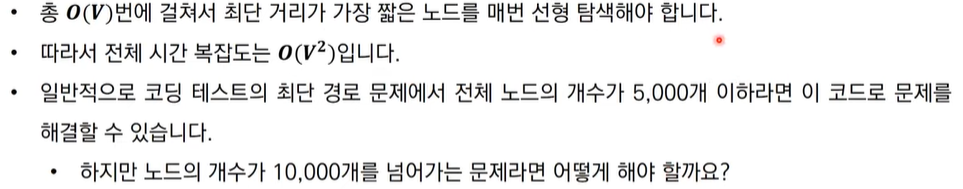

## 우선순위 큐(Priority Queue) 그리고 힙(Heap)
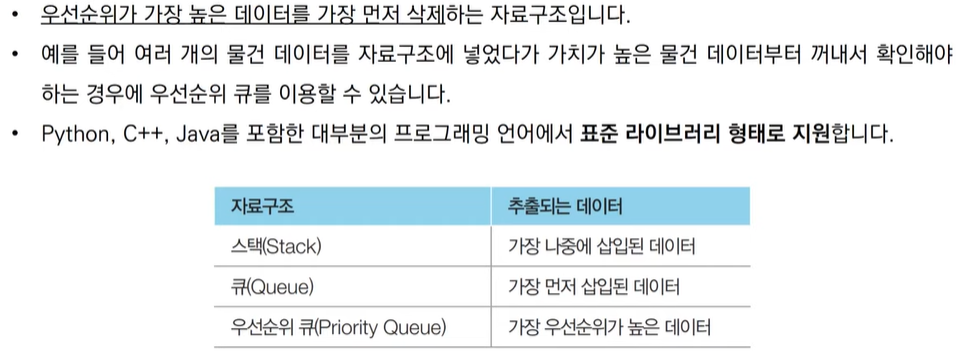
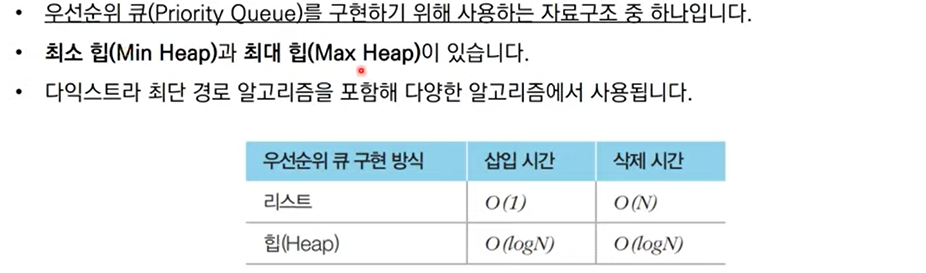
* 힙은 기본적으로 트리구조로 이루어져있으며, 데이터 삽입과 삭제에 있어서 O(logN)만큼의 시간을 소요함!

### import heapq => default로 min-heap

In [10]:
''' python - 힙(Heap) 라이브러리 사용 예제'''

import heapq   # 중요!!  힙큐 라고 기억

# 오름차순 힙정렬(Heap Sort) - Min Heap
def heapsort(iterable):
    h = []
    result = []
    
    #모든 원소를 힙에 삽입 -> .heappush()
    for value in iterable:
        heapq.heappush(h, value)
        
    print(heapq)          # 자료형을 알 수 있다.
    
    # 출력해보자 : 힙에 삽입된 모든 원소 차례대로 꺼내어 리스트에 반환
    for i in range(len(h)):
        result.append(heapq.heappop(h))   # -> .heappop()
        
    return result

result = heapsort([1,3,5,7,9,2,4,6,8,0])
print(result)

<module 'heapq' from 'C:\\Users\\Tae\\anaconda3\\lib\\heapq.py'>
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### import heapq => max-heap으로 변환하여 활용해보기

In [9]:
''' python - 힙(Heap) 라이브러리 사용 예제'''
import heapq   # 중요!!  힙큐 라고 기억

def heapsort(iterable):
    h = []
    result = []
    
    for value in iterable:
        heapq.heappush(h, -value)    # (중요) 삽입 시 부호만 -로 바꿔준다!!
            
    for i in range(len(h)):
        result.append(-heapq.heappop(h))  # (중요) 출력 시 부호 바꿔서 꺼내준다 
        
    return result

result = heapsort([1,3,5,7,9,2,4,6,8,0])
print(result)

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
